In [30]:
import os 
import random 
import numpy as np
import pandas as pd 
import tensorflow as tf 
from pprint import pprint 
from pylab import plt,mpl 
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family'] ='serif'
pd.set_option('display.precision',4)
np.set_printoptions(suppress=True,precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [31]:
import numpy as np 
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense

In [32]:
def transform(X):
  y = 0.05 * X**2 + 0.2 * X + np.sin(X) + 5
  y += np.random.standard_normal(len(X)) * 0.2
  return y


In [33]:
X = np.linspace(-2*np.pi,2*np.pi,500)
a = transform(X)

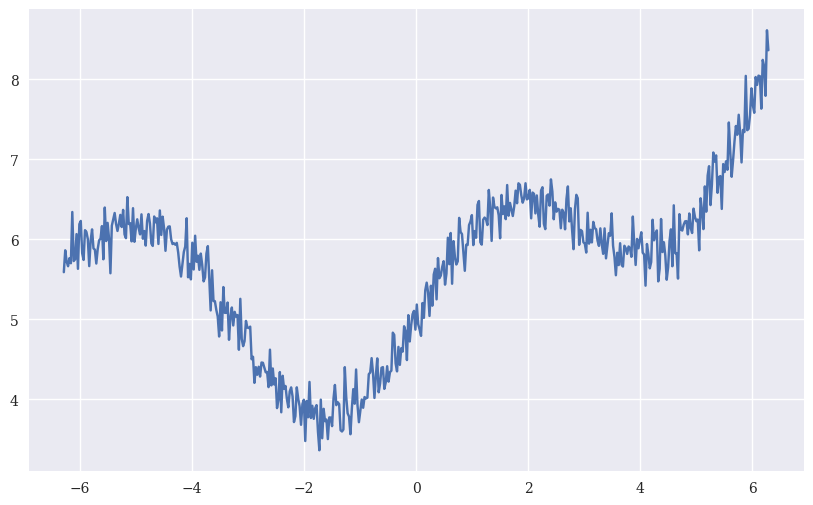

In [34]:
plt.figure(figsize=(10,6))
plt.plot(X,a)

In [35]:
a = a.reshape((len(a),-1))
a[:5]

array([[5.5903],
       [5.8638],
       [5.7223],
       [5.6649],
       [5.7654]])

In [36]:
lags = 5
g = tf.keras.preprocessing.sequence.TimeseriesGenerator(a,a,length=lags,batch_size=5)

In [37]:
print(g)

In [38]:
model = Sequential()
model.add(SimpleRNN(500,activation='relu',input_shape=(lags,1)))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 500)            │       251,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,501 (982.43 KB)

 Trainable params: 251,501 (982.43 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
%%time 
model.fit(g,epochs=500,steps_per_epoch=10,verbose=False)

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


CPU times: user 25.5 s, sys: 10.5 s, total: 36 s
Wall time: 18.2 s


In [43]:
X = np.linspace(-6*np.pi,6*np.pi,1000)
d = transform(X)
g_ = tf.keras.preprocessing.sequence.TimeseriesGenerator(d,d,length=lags,batch_size=len(d))
f = list(g_)[0][0].reshape(len(d)-lags,lags,1)
y = model.predict(f,verbose=False)


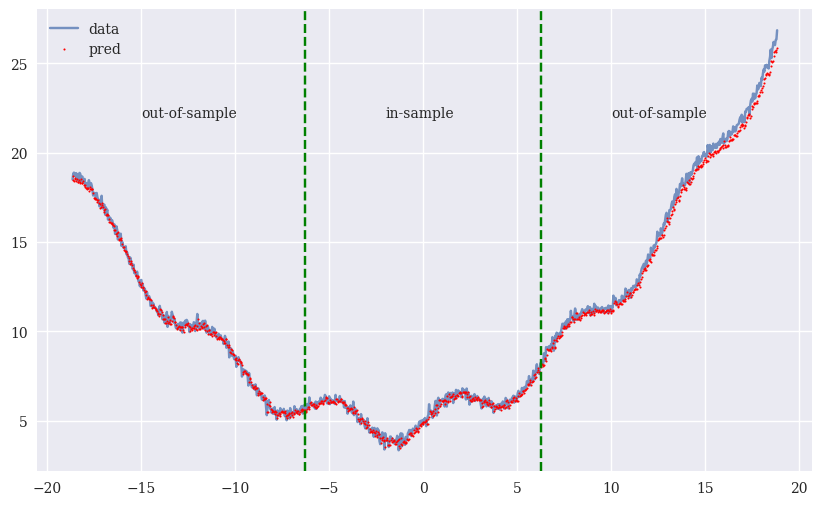

In [44]:
plt.figure(figsize=(10,6))
plt.plot(X[lags:],d[lags:],label='data',alpha=0.75)
plt.plot(X[lags:],y,'r.',label='pred',ms=3)
plt.axvline(-2*np.pi,c='g',ls='--')
plt.axvline(2*np.pi,c='g',ls='--')
plt.text(-15,22,'out-of-sample')
plt.text(-2,22,'in-sample')
plt.text(10,22,'out-of-sample')
plt.legend()
